### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

##### Loading data sets

In [2]:
#load events dataset
events = pd.read_csv('events.csv', sep=',')

In [3]:
events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [4]:
#duplicating event table
dup_event = events.copy()

In [5]:
# Convert timestamp to datetime
dup_event["timestamp"] = pd.to_datetime(events["timestamp"], unit="ms")

In [6]:
dup_event

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


In [7]:
#loading item properties 
ip1 = pd.read_csv("item_properties_part1.csv", sep=',')
ip2 = pd.read_csv("item_properties_part2.csv", sep=',')

In [8]:
ip1
ip2

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
...,...,...,...,...
9275898,1433646000000,236931,929,n12.000
9275899,1440903600000,455746,6,150169 639134
9275900,1439694000000,347565,686,610834
9275901,1433646000000,287231,867,769062


In [9]:
# Item Properties (combine from the 2 files)
item_properties = pd.concat([ip1, ip2], ignore_index=True)

In [10]:
item_properties

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
20275897,1433646000000,236931,929,n12.000
20275898,1440903600000,455746,6,150169 639134
20275899,1439694000000,347565,686,610834
20275900,1433646000000,287231,867,769062


In [11]:
#creating a copy of the item properties dataset
dup_item_properties = item_properties.copy()

In [12]:
dup_item_properties

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
20275897,1433646000000,236931,929,n12.000
20275898,1440903600000,455746,6,150169 639134
20275899,1439694000000,347565,686,610834
20275900,1433646000000,287231,867,769062


In [13]:
# Convert timestamp to datetime
dup_item_properties["timestamp"] = pd.to_datetime(dup_item_properties["timestamp"], unit="ms")

In [14]:
dup_item_properties

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000
20275898,2015-08-30 03:00:00,455746,6,150169 639134
20275899,2015-08-16 03:00:00,347565,686,610834
20275900,2015-06-07 03:00:00,287231,867,769062


In [15]:
# Category tree
category_tree = pd.read_csv("category_tree.csv")
category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [16]:
dup_category_tree = category_tree.copy()

##### Cleaning

In [17]:
dup_event

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


In [18]:
dup_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.1+ MB


In [19]:
#converting transactionid to a more appropriate string type 
dup_event['transactionid'] = dup_event['transactionid'].astype('Int64').astype(str)

In [20]:
#since numeric columns have no matematical meaning and are meant to be categorical, convert to string
dup_event["itemid"] = dup_event["itemid"].astype(str)
dup_event["visitorid"] = dup_event["visitorid"].astype(str)

In [21]:
dup_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      object        
 2   event          object        
 3   itemid         object        
 4   transactionid  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 105.1+ MB


In [22]:
#checking for nulls
dup_event.isnull().sum()

#as expected, no nulls

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64

In [23]:
dup_event["event"].value_counts()

#in accordance with expected consumer behaviour, views are exponential more than addtochart and transaction.

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [24]:
#now to item properties

dup_item_properties

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000
20275898,2015-08-30 03:00:00,455746,6,150169 639134
20275899,2015-08-16 03:00:00,347565,686,610834
20275900,2015-06-07 03:00:00,287231,867,769062


In [25]:
#looking more closely at property column
dup_item_properties['property'].unique()

array(['categoryid', '888', '400', ..., '1091', '522', '769'],
      dtype=object)

In [26]:
dup_item_properties["property"].value_counts()

property
888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
               ...   
782                 1
288                 1
722                 1
744                 1
769                 1
Name: count, Length: 1104, dtype: int64

In [27]:
#i want to see how the rows with availble property look like to confirm documentation

# Filter rows where the 'property' column is exactly 'available'
available_rows = dup_item_properties[dup_item_properties['property'] == 'available']

# View the result
print(available_rows)


                   timestamp  itemid   property value
5        2015-07-05 03:00:00  285026  available     0
15       2015-07-19 03:00:00  186518  available     0
79       2015-06-07 03:00:00  423682  available     0
82       2015-06-14 03:00:00  316253  available     1
96       2015-07-19 03:00:00  430459  available     0
...                      ...     ...        ...   ...
20275845 2015-08-30 03:00:00  229797  available     0
20275855 2015-08-02 03:00:00  225378  available     1
20275889 2015-05-31 03:00:00  356167  available     0
20275891 2015-08-09 03:00:00  200211  available     0
20275896 2015-07-05 03:00:00   74745  available     0

[1503639 rows x 4 columns]


In [28]:
dup_item_properties

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000
20275898,2015-08-30 03:00:00,455746,6,150169 639134
20275899,2015-08-16 03:00:00,347565,686,610834
20275900,2015-06-07 03:00:00,287231,867,769062


In [29]:
dup_item_properties.duplicated().sum()

0

In [30]:
#sorting the dataframe by timestamp

dup_item_properties = dup_item_properties.sort_values("timestamp")

In [31]:
#keeping only the latest(most recent) entry for a combination of itemid and property
latest_props = (
    dup_item_properties
    .groupby(["itemid", "property"], as_index=False)
    .last()  # Keeps the last (i.e., most recent) row per group
)

In [32]:
#transforming the dataset into wide form
item_matrix = latest_props.pivot(index="itemid", columns="property", values="value").reset_index()

In [33]:
item_matrix

property,itemid,0,1,10,100,1000,1001,1002,1003,1004,...,992,993,994,995,996,997,998,999,available,categoryid
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,209
1,1,769062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1114
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1305
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1171
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417048,466862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1376
417049,466863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,173
417050,466864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,373
417051,466865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150169 780351 820477 437265 951705,NaN,NaN,NaN,NaN,NaN,0,421


In [34]:
#doing a sanity check before deciding on how to tackle available column
item_matrix["available"].unique()

array(['0', '1'], dtype=object)

In [35]:
#converting available column into integer since it's a binary category
item_matrix["available"] = item_matrix["available"].astype("Int64")  # with capital 'I' to cover possible nulls

In [36]:
#converting available column into integer since it's a binary category
item_matrix["itemid"] = item_matrix["itemid"].astype(str)

In [37]:
item_matrix["categoryid"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 417053 entries, 0 to 417052
Series name: categoryid
Non-Null Count   Dtype 
--------------   ----- 
417053 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [38]:
item_matrix

property,itemid,0,1,10,100,1000,1001,1002,1003,1004,...,992,993,994,995,996,997,998,999,available,categoryid
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,209
1,1,769062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1114
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1305
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1171
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417048,466862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1376
417049,466863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,173
417050,466864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,373
417051,466865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150169 780351 820477 437265 951705,NaN,NaN,NaN,NaN,NaN,0,421


In [39]:
dup_category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [40]:
dup_category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [41]:
#converting parentid to int, then object to it matches category id in item matrix
dup_category_tree["parentid"] = dup_category_tree["parentid"].astype("Int64")  # with capital 'I' to cover possible nulls

In [42]:
dup_category_tree["parentid"] = dup_category_tree["parentid"].astype(str)  

In [43]:
#converting the categories into the appropriate sting datatype
dup_category_tree["categoryid"] = dup_category_tree["categoryid"].astype(str)


# keeping NaNs, converting others to int first since it's currently a float
dup_category_tree["parentid"] = dup_category_tree["parentid"].apply(
    lambda x: str(x) if pd.notna(x) else np.nan
)


In [44]:
dup_category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryid  1669 non-null   object
 1   parentid    1669 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB


In [45]:
#building hierarchy for the categories to better understand relationships when learning

def get_ancestors(cat_id, tree_dict):
    path = []
    while cat_id in tree_dict and pd.notna(tree_dict[cat_id]):
        cat_id = tree_dict[cat_id]
        path.append(cat_id)
    return path

# Build the mapping from child to parent
tree_dict = dict(zip(dup_category_tree["categoryid"], dup_category_tree["parentid"]))

# Compute the list of ancestors for each categoryid
dup_category_tree["ancestors"] = dup_category_tree["categoryid"].apply(lambda x: get_ancestors(x, tree_dict))

In [46]:
dup_category_tree

,categoryid,parentid,ancestors
0,1016,213,"[213, 1299, 1532, <NA>]"
1,809,169,"[169, 1257, 395, <NA>]"
2,570,9,"[9, 351, 653, <NA>]"
3,1691,885,"[885, 1579, <NA>]"
4,536,1691,"[1691, 885, 1579, <NA>]"
...,...,...,...
1664,49,1125,"[1125, 113, 1532, <NA>]"
1665,1112,630,"[630, 679, <NA>]"
1666,1336,745,"[745, 540, 140, <NA>]"
1667,689,207,"[207, 1490, <NA>]"


In [47]:
expanded_df = dup_category_tree.explode("ancestors")

# Optionally, rename columns for clarity
expanded_df = expanded_df.rename(columns={
    "categoryid": "categoryid",
    "ancestors": "ancestor"
})

# Remove rows where ancestor is NaN
expanded_df = expanded_df.dropna(subset=["ancestor"]).reset_index(drop=True)

print(expanded_df)


     categoryid parentid ancestor
0          1016      213      213
1          1016      213     1299
2          1016      213     1532
3          1016      213     <NA>
4           809      169      169
...         ...      ...      ...
5662        689      207      207
5663        689      207     1490
5664        689      207     <NA>
5665        761      395      395
5666        761      395     <NA>

[5667 rows x 3 columns]


### Model Prep

updated_df1 = item_matrix.merge(
    expanded_df,
    on="categoryid",
    how="left"
)

In [48]:
#merging the two tables is proving difficult for my computer memory. So I am dropping sparse columns 
#(columns with 95% nulls in this case)
# set your threshold
threshold = 0.05  

# calculate non-null ratio for each column
non_null_ratio = item_matrix.notnull().mean()

# filter columns above threshold
keep_cols = non_null_ratio[non_null_ratio >= threshold].index

# keep only these columns
item_matrix_reduced = item_matrix[keep_cols]

print("Original shape:", item_matrix.shape)
print("Reduced shape:", item_matrix_reduced.shape)

Original shape: (417053, 1105)
Reduced shape: (417053, 71)


In [49]:
updated_df1 = item_matrix_reduced.merge(
    expanded_df,
    on="categoryid",
    how="left"
)

In [50]:
updated_df1

,itemid,1036,1066,112,159,19,202,213,227,230,...,928,935,941,960,961,976,available,categoryid,parentid,ancestor
0,0,1276750,NaN,679677,519769,NaN,478989,NaN,1152934 1238769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,209,293,293
1,0,1276750,NaN,679677,519769,NaN,478989,NaN,1152934 1238769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,209,293,1532
2,0,1276750,NaN,679677,519769,NaN,478989,NaN,1152934 1238769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,209,293,<NA>
3,1,1154859,NaN,679677,519769,NaN,172646,NaN,1020281 150169 1263524,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1114,113,113
4,1,1154859,NaN,679677,519769,NaN,172646,NaN,1020281 150169 1263524,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1114,113,1532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412399,466865,NaN,NaN,679677,519769,NaN,150169 780351 820477 437265 951705 103274,NaN,1088309,NaN,...,1154859,NaN,NaN,NaN,NaN,NaN,0,421,1424,<NA>
1412400,466866,NaN,NaN,679677,519769,NaN,892415 670753 114844 808585,NaN,579062 353870,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1164,1266,1266
1412401,466866,NaN,NaN,679677,519769,NaN,892415 670753 114844 808585,NaN,579062 353870,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1164,1266,293
1412402,466866,NaN,NaN,679677,519769,NaN,892415 670753 114844 808585,NaN,579062 353870,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1164,1266,1532


In [51]:
#merging the event table with my new merged table
final_df = dup_event.merge(
    updated_df1,
    on="itemid",
    how="left"
)

In [52]:
final_df

,timestamp,visitorid,event,itemid,transactionid,1036,1066,112,159,19,...,928,935,941,960,961,976,available,categoryid,parentid,ancestor
0,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,726612,NaN,NaN,NaN,NaN,NaN,1,1173,805,805
1,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,726612,NaN,NaN,NaN,NaN,NaN,1,1173,805,384
2,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,726612,NaN,NaN,NaN,NaN,NaN,1,1173,805,140
3,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,726612,NaN,NaN,NaN,NaN,NaN,1,1173,805,<NA>
4,2015-06-02 05:50:14.164,992329,view,248676,<NA>,961511,NaN,679677,519769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1231,901,901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085776,2015-08-01 03:08:50.703,1184451,view,283392,<NA>,NaN,NaN,679677,519769,1297729 n36.000 350726 30603 832471,...,769062,NaN,NaN,NaN,NaN,NaN,1,1589,1426,<NA>
9085777,2015-08-01 03:36:03.914,199536,view,152913,<NA>,NaN,NaN,679677,519769,NaN,...,769062,NaN,1099473 245814,NaN,NaN,NaN,0,469,1383,1383
9085778,2015-08-01 03:36:03.914,199536,view,152913,<NA>,NaN,NaN,679677,519769,NaN,...,769062,NaN,1099473 245814,NaN,NaN,NaN,0,469,1383,409
9085779,2015-08-01 03:36:03.914,199536,view,152913,<NA>,NaN,NaN,679677,519769,NaN,...,769062,NaN,1099473 245814,NaN,NaN,NaN,0,469,1383,140


In [53]:
#seeing the different types of events

final_df['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [54]:
#assigning weights to the different events, since events aren't equal
weight_map = {
    "view": 1,
    "addtocart": 3,
    "transaction": 5
}
final_df["interaction_strength"] = final_df["event"].map(weight_map)

In [55]:
final_df

,timestamp,visitorid,event,itemid,transactionid,1036,1066,112,159,19,...,935,941,960,961,976,available,categoryid,parentid,ancestor,interaction_strength
0,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1173,805,805,1
1,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1173,805,384,1
2,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1173,805,140,1
3,2015-06-02 05:02:12.117,257597,view,355908,<NA>,726612,n1020.000 424566,679677,519769,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1173,805,<NA>,1
4,2015-06-02 05:50:14.164,992329,view,248676,<NA>,961511,NaN,679677,519769,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1231,901,901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085776,2015-08-01 03:08:50.703,1184451,view,283392,<NA>,NaN,NaN,679677,519769,1297729 n36.000 350726 30603 832471,...,NaN,NaN,NaN,NaN,NaN,1,1589,1426,<NA>,1
9085777,2015-08-01 03:36:03.914,199536,view,152913,<NA>,NaN,NaN,679677,519769,NaN,...,NaN,1099473 245814,NaN,NaN,NaN,0,469,1383,1383,1
9085778,2015-08-01 03:36:03.914,199536,view,152913,<NA>,NaN,NaN,679677,519769,NaN,...,NaN,1099473 245814,NaN,NaN,NaN,0,469,1383,409,1
9085779,2015-08-01 03:36:03.914,199536,view,152913,<NA>,NaN,NaN,679677,519769,NaN,...,NaN,1099473 245814,NaN,NaN,NaN,0,469,1383,140,1


In [56]:
#i am only interested in available items to train the model 
event_avail = final_df[final_df["available"] == 1]

In [57]:
interaction_df = (
    event_avail
    .groupby(["visitorid", "itemid"], as_index=False)
    .agg({"interaction_strength": "sum"})
)

In [58]:
interaction_df

,visitorid,itemid,interaction_strength
0,0,285930,3
1,0,357564,3
2,0,67045,3
3,1000,248975,4
4,10000,401285,6
...,...,...,...
753252,999996,182000,8
753253,999996,28219,4
753254,999996,371008,4
753255,999996,51259,6


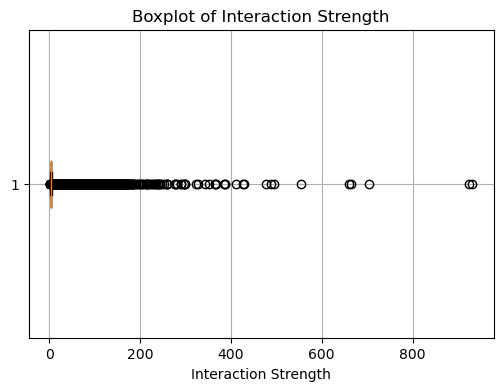

In [59]:
#i want to see the distribution of interaction score

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(interaction_df["interaction_strength"], vert=False)
plt.title("Boxplot of Interaction Strength")
plt.xlabel("Interaction Strength")
plt.grid(True)
plt.show()

In [60]:
#i want to address the outliers
# Calculate thresholds
threshold = np.percentile(interaction_df["interaction_strength"], 99.9)

# Filter rows above threshold
outliers = interaction_df[interaction_df["interaction_strength"] > threshold]

print(f"99th percentile threshold: {threshold}")
print(f"Number of outlier rows: {len(outliers)}")

# Show a sample of the outliers
outliers.head(20)

99th percentile threshold: 76.0
Number of outlier rows: 737


,visitorid,itemid,interaction_strength
1042,1001673,366859,108
1790,1003058,312728,92
2201,1003856,272455,105
3282,1005673,442159,112
4922,1008735,164863,212
5246,1009201,324079,176
6847,1011964,383409,100
7058,1012365,161650,78
8223,1014434,19883,168
10247,101716,122081,84


In [61]:
#using winsorization to cap interaction scores in the 99.9th percentile instaed of dropping outliers completely

# cap interaction_strength at 99th percentile
cap_value = np.percentile(interaction_df["interaction_strength"], 99.9)
interaction_df["interaction_strength"] = interaction_df["interaction_strength"].clip(upper=cap_value)

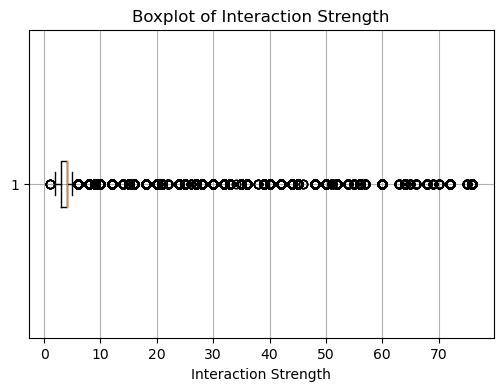

In [62]:
plt.figure(figsize=(6, 4))
plt.boxplot(interaction_df["interaction_strength"], vert=False)
plt.title("Boxplot of Interaction Strength")
plt.xlabel("Interaction Strength")
plt.grid(True)
plt.show()

#fewer outliers now

### Training

In [63]:
event_interaction_df = interaction_df.copy()

In [64]:
from scipy.sparse import csr_matrix

# map ids to indices
user_ids = event_interaction_df["visitorid"].unique()
item_ids = event_interaction_df["itemid"].unique()

user_map = {u: i for i, u in enumerate(user_ids)}
item_map = {i: j for j, i in enumerate(item_ids)}

event_interaction_df["user_idx"] = event_interaction_df["visitorid"].map(user_map)
event_interaction_df["item_idx"] = event_interaction_df["itemid"].map(item_map)

# build sparse matrix
user_item_matrix = csr_matrix(
    (event_interaction_df["interaction_strength"], 
     (event_interaction_df["user_idx"], event_interaction_df["item_idx"]))
)

#### Popularity based

In [65]:
# Computing item popularity by summing interaction strengths
item_popularity = (
    event_interaction_df
    .groupby("itemid")["interaction_strength"]
    .sum()
    .reset_index()
)

In [66]:
# Ranking items by popularity
item_popularity["rank"] = item_popularity["interaction_strength"].rank(
    method="first", ascending=False
)

In [67]:
# Sorting by most popular
item_popularity = item_popularity.sort_values(
    by="interaction_strength", ascending=False
).reset_index(drop=True)

In [68]:
# View top 10 most popular items
print(item_popularity.head(10))

   itemid  interaction_strength  rank
0  461686                 16168   1.0
1    5411                  9408   2.0
2  219512                  7776   3.0
3    7943                  7176   4.0
4  384302                  7156   5.0
5  441668                  6124   6.0
6  312728                  6100   7.0
7  234255                  6096   8.0
8  111530                  5932   9.0
9  320130                  5670  10.0


In [69]:
def recommend_popular_items(n=10):
    return item_popularity.head(n)["itemid"].tolist()

# Example: recommend top 10 items for any user
print(recommend_popular_items(10))

['461686', '5411', '219512', '7943', '384302', '441668', '312728', '234255', '111530', '320130']


In [70]:
from sklearn.model_selection import train_test_split

# Split interactions into train (80%) and test (20%)
train_df, test_df = train_test_split(
    event_interaction_df,
    test_size=0.2,
    random_state=42
)

In [71]:
item_popularity = (
    train_df
    .groupby("itemid")["interaction_strength"]
    .sum()
    .reset_index()
    .sort_values("interaction_strength", ascending=False)
)

popular_items = item_popularity["itemid"].tolist()

In [72]:
def recommend_popular_items(n=10):
    return popular_items[:n]

In [73]:
def precision_at_k(actual, predicted, k=10):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / float(k)

In [74]:
def apk(actual, predicted, k=10):
    """
    Average Precision at K
    """
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)

In [75]:
def mapk(actual_list, predicted_list, k=10):
    return np.mean([apk(a, p, k) for a, p in zip(actual_list, predicted_list)])

In [76]:
users = test_df["visitorid"].unique()

precisions = []
apk_scores = []

for user in users:
    actual_items = test_df[test_df["visitorid"] == user]["itemid"].tolist()
    recommended_items = recommend_popular_items(n=10)

    precisions.append(precision_at_k(actual_items, recommended_items, k=10))
    apk_scores.append(apk(actual_items, recommended_items, k=10))

print("Popularity Model Evaluation:")
print("Precision@10:", np.mean(precisions))
print("MAP@10:", np.mean(apk_scores))

Popularity Model Evaluation:
Precision@10: 0.0019202217163218848
MAP@10: 0.006003057534074517


#### Personalized recommender 1 (ALS)

In [77]:
# Encode visitorid and itemid to indices
unique_users = event_interaction_df['visitorid'].unique()
user_mapping = {user: idx for idx, user in enumerate(unique_users)}

unique_items = event_interaction_df['itemid'].unique()
item_mapping = {item: idx for idx, item in enumerate(unique_items)}

# Apply mapping
event_interaction_df['user_idx'] = event_interaction_df['visitorid'].map(user_mapping)
event_interaction_df['item_idx'] = event_interaction_df['itemid'].map(item_mapping)

In [78]:
# Create train/test split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(event_interaction_df, test_size=0.2, random_state=42)

In [79]:
# Build sparse matrices (using the mapped indices!)
from scipy.sparse import coo_matrix

train_csr = coo_matrix(
    (train_df['interaction_strength'],
     (train_df['user_idx'], train_df['item_idx']))
)

test_csr = coo_matrix(
    (test_df['interaction_strength'],
     (test_df['user_idx'], test_df['item_idx']))
)

In [80]:
# Train ALS on train_csr
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=20)
als_model.fit(train_csr)

C:\Users\COMPUFY\anaconda3\Lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()
C:\Users\COMPUFY\anaconda3\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.048002004623413086 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

In [81]:
# Prepare test_truth (must use user_idx/item_idx, not raw IDs!)
test_truth = (
    test_df.groupby("user_idx")["item_idx"].apply(set).to_dict()
)

In [82]:
def precision_at_k(model, user_item_csr, test_truth, k=10):
    precisions = []
    for user, true_items in test_truth.items():
        # Get top-K recommendations for this user
        recommended, _ = model.recommend(
            userid=user,
            user_items=user_item_csr[user],
            N=k,
            filter_already_liked_items=True
        )
        
        # Compute overlap
        hit_count = len(set(recommended) & true_items)
        precisions.append(hit_count / k)
    
    return np.mean(precisions)


def map_at_k(model, user_item_csr, test_truth, k=10):
    aps = []
    for user, true_items in test_truth.items():
        recommended, _ = model.recommend(
            userid=user,
            user_items=user_item_csr[user],
            N=k,
            filter_already_liked_items=True
        )

        score = 0.0
        hits = 0
        for i, rec in enumerate(recommended, start=1):
            if rec in true_items:
                hits += 1
                score += hits / i   # precision at this rank
        if hits > 0:
            aps.append(score / min(len(true_items), k))
        else:
            aps.append(0.0)
    
    return np.mean(aps)

In [83]:
prec10 = precision_at_k(als_model, train_csr.tocsr(), test_truth, k=10)
map10 = map_at_k(als_model, train_csr.tocsr(), test_truth, k=10)

print(f"Precision@10: {prec10:.4f}")
print(f"MAP@10: {map10:.4f}")

Precision@10: 0.0079
MAP@10: 0.0295


#### BPR

In [84]:
from implicit.bpr import BayesianPersonalizedRanking

# Train BPR model
bpr_model = BayesianPersonalizedRanking(
    factors=64,        # embedding size
    learning_rate=0.01,
    regularization=0.01,
    iterations=50,     # more iterations usually needed than ALS
    random_state=42
)
bpr_model.fit(train_csr, show_progress=True)

C:\Users\COMPUFY\anaconda3\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0069980621337890625 seconds
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

In [85]:
train_csr = train_csr.tocsr()

prec10_bpr = precision_at_k(bpr_model, train_csr, test_truth, k=10)
map10_bpr = map_at_k(bpr_model, train_csr, test_truth, k=10)

print(f"BPR Precision@10: {prec10_bpr:.4f}")
print(f"BPR MAP@10: {map10_bpr:.4f}")

BPR Precision@10: 0.0004
BPR MAP@10: 0.0006


#### ALS out performed baseline popularity and even BPR

In [100]:
#my goal is to improve ALS since it's currently my best performing model
#to start, i will reweight the matrix

# Encode users and items
user_mapping = {u: i for i, u in enumerate(event_interaction_df['visitorid'].unique())}
item_mapping = {i: j for j, i in enumerate(event_interaction_df['itemid'].unique())}

event_interaction_df['user_idx'] = event_interaction_df['visitorid'].map(user_mapping)
event_interaction_df['item_idx'] = event_interaction_df['itemid'].map(item_mapping)

# Build user-item sparse matrix
user_item_csr = csr_matrix(
    (event_interaction_df['interaction_strength'],
     (event_interaction_df['user_idx'], interaction_df['item_idx']))
)

In [101]:
from implicit.nearest_neighbours import bm25_weight

train_csr = train_csr.tocsr()  # make sure it's CSR

# --- BM25 weighting ---
bm25_train = bm25_weight(train_csr, K1=100, B=0.8)  # K1, B are tunable
bm25_train = bm25_train.tocsr()

In [102]:
als_weight = AlternatingLeastSquares(
    factors=50,         # latent dimensions
    regularization=0.01,
    iterations=20,
    random_state=42
)

als_weight.fit(bm25_train)

  0%|          | 0/20 [00:00<?, ?it/s]

In [104]:
import random

all_users = list(range(user_item_csr.shape[0]))
random.seed(42)
valid_users = random.sample(all_users, int(0.2 * len(all_users)))  # 20% users for validation

In [105]:
test_truth = {}
for u in valid_users:
    items = user_item_csr[u].indices
    if len(items) > 0:
        test_truth[u] = set(items)

In [106]:
def precision_at_k(model, user_item_csr, test_truth, k=10):
    precisions = []
    num_users = user_item_csr.shape[0]

    for user, true_items in test_truth.items():
        if user >= num_users:  # skip unseen users
            continue

        recommended, _ = model.recommend(
            userid=user,
            user_items=user_item_csr[user],
            N=k,
            filter_already_liked_items=True,
            recalculate_user=False
        )

        hit_count = len(set(recommended) & true_items)
        precisions.append(hit_count / k)

    return np.mean(precisions) if precisions else 0.0


def map_at_k(model, user_item_csr, test_truth, k=10):
    aps = []
    num_users = user_item_csr.shape[0]

    for user, true_items in test_truth.items():
        if user >= num_users:  # skip unseen users
            continue

        recommended, _ = model.recommend(
            userid=user,
            user_items=user_item_csr[user],
            N=k,
            filter_already_liked_items=True,
            recalculate_user=False
        )

        if not true_items:
            continue

        score = 0.0
        hits = 0
        for i, item in enumerate(recommended, start=1):
            if item in true_items:
                hits += 1
                score += hits / i

        if hits > 0:
            aps.append(score / min(len(true_items), k))

    return np.mean(aps) if aps else 0.0

In [107]:
prec10 = precision_at_k(als_weight, bm25_train, test_truth, k=10)
map10 = map_at_k(als_weight, bm25_train, test_truth, k=10)

print(f"weightPrecision@10: {prec10:.4f}")
print(f"weightMAP@10: {map10:.4f}")

weightPrecision@10: 0.0028
weightMAP@10: 0.1943
